In [100]:
import pandas as pd
import numpy as np
import copy

In [1]:
data_path = 'data.csv'

In [9]:
data = pd.read_csv(data_path, sep=';')

In [10]:
data.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [101]:
data2 = copy.deepcopy(data)

In [105]:
data2.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [136]:
data2['couple_gares'] = [f"{row.gare_depart}-{row.gare_arrivee}" for row in data2.itertuples()]

In [170]:
data2['retard_parcours'] = (data2['retard_moyen_arrivee']-data2['retard_moyen_depart'])/data2['duree_moyenne']

In [171]:
data2.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,couple_gares,retard_parcours
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,BORDEAUX ST JEAN-PARIS MONTPARNASSE,0.121907
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,LA ROCHELLE VILLE-PARIS MONTPARNASSE,0.113024
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,PARIS MONTPARNASSE-QUIMPER,0.209959
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,PARIS MONTPARNASSE-ST MALO,0.184042
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,PARIS MONTPARNASSE-ST PIERRE DES CORPS,0.075544


In [99]:
data[data['gare_arrivee'] == 'TOURCOING']['gare_depart'].value_counts()

MARSEILLE ST CHARLES    65
BORDEAUX ST JEAN        64
Name: gare_depart, dtype: int64

In [147]:
column1='couple_gares'
column2='retard_moyen_depart'

In [138]:
numerical_label = {couple : i for i, couple in enumerate(list(dict(data2['couple_gares'].value_counts()).keys()))}

In [134]:
for i,j in enumerate(list(data2['couple_gares'].value_counts().keys())):
    print(i)
    print(j)

0
['BORDEAUX ST JEAN', 'PARIS MONTPARNASSE']
1
['PARIS LYON', 'ITALIE']
2
['ANNECY', 'PARIS LYON']
3
['PARIS NORD', 'DUNKERQUE']
4
['VANNES', 'PARIS MONTPARNASSE']
5
['PARIS MONTPARNASSE', 'VANNES']
6
['PARIS MONTPARNASSE', 'TOULOUSE MATABIAU']
7
['PARIS MONTPARNASSE', 'NANTES']
8
['PARIS MONTPARNASSE', 'LE MANS']
9
['PARIS MONTPARNASSE', 'LA ROCHELLE VILLE']
10
['PARIS MONTPARNASSE', 'BREST']
11
['NANTES', 'PARIS MONTPARNASSE']
12
['LYON PART DIEU', 'RENNES']
13
['ANGOULEME', 'PARIS MONTPARNASSE']
14
['PARIS LYON', 'LAUSANNE']
15
['ITALIE', 'PARIS LYON']
16
['RENNES', 'PARIS MONTPARNASSE']
17
['FRANCFORT', 'PARIS EST']
18
['SAINT ETIENNE CHATEAUCREUX', 'PARIS LYON']
19
['PARIS LYON', 'NIMES']
20
['PARIS LYON', 'MACON LOCHE']
21
['PARIS LYON', 'LE CREUSOT MONTCEAU MONTCHANIN']
22
['PARIS LYON', 'GRENOBLE']
23
['NIMES', 'PARIS LYON']
24
['GRENOBLE', 'PARIS LYON']
25
['BESANCON FRANCHE COMTE TGV', 'PARIS LYON']
26
['PARIS NORD', 'LILLE']
27
['LYON PART DIEU', 'LILLE']
28
['LA ROCHELLE VI

In [123]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2[column1] = label_encoder.fit_transform(data2[column1])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

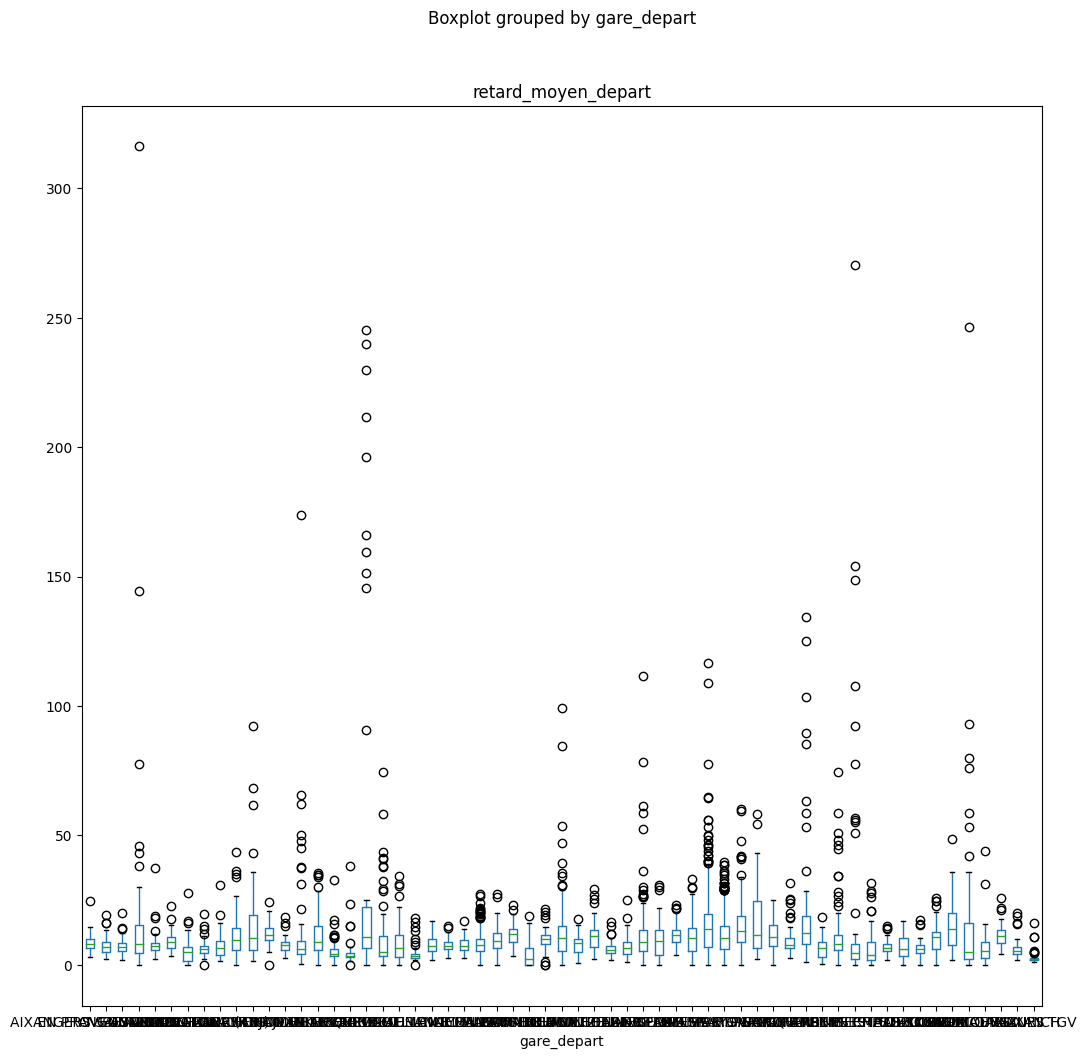

In [148]:
# plt.figure(figsize=(8, 6))

# Use the boxplot function to create the box plot.
data2.boxplot(column=column2, by='gare_depart', vert=True, grid=False, figsize=(12,12))

# Show the plot.
plt.show()

In [159]:
lignes_au_depart = {gare : list(set(couple.split('-')[1] for couple in data2['couple_gares'].to_list() if couple.split('-')[0] == gare)) for gare in data2['gare_depart'].drop_duplicates()}

In [160]:
lignes_au_depart

{'BORDEAUX ST JEAN': ['TOURCOING', 'PARIS VAUGIRARD', 'PARIS MONTPARNASSE'],
 'LA ROCHELLE VILLE': ['PARIS MONTPARNASSE'],
 'PARIS MONTPARNASSE': ['ANGOULEME',
  'ST PIERRE DES CORPS',
  'ANGERS SAINT LAUD',
  'POITIERS',
  'LAVAL',
  'BREST',
  'RENNES',
  'LE MANS',
  'TOURS',
  'QUIMPER',
  'ST MALO',
  'VANNES',
  'BORDEAUX ST JEAN',
  'LA ROCHELLE VILLE',
  'NANTES',
  'TOULOUSE MATABIAU'],
 'QUIMPER': ['PARIS MONTPARNASSE'],
 'RENNES': ['PARIS VAUGIRARD', 'LYON PART DIEU', 'PARIS MONTPARNASSE'],
 'ST PIERRE DES CORPS': ['PARIS MONTPARNASSE'],
 'TOURS': ['PARIS MONTPARNASSE'],
 'NANTES': ['STRASBOURG', 'PARIS VAUGIRARD', 'PARIS MONTPARNASSE'],
 'PARIS EST': ['FRANCFORT',
  'REIMS',
  'METZ',
  'NANCY',
  'STUTTGART',
  'STRASBOURG'],
 'STRASBOURG': ['PARIS EST', 'NANTES'],
 'DUNKERQUE': ['PARIS NORD'],
 'LILLE': ['LYON PART DIEU', 'MARSEILLE ST CHARLES', 'PARIS NORD'],
 'PARIS VAUGIRARD': ['NANTES', 'RENNES', 'BORDEAUX ST JEAN'],
 'TOURCOING': ['MARSEILLE ST CHARLES', 'BORDEAUX ST

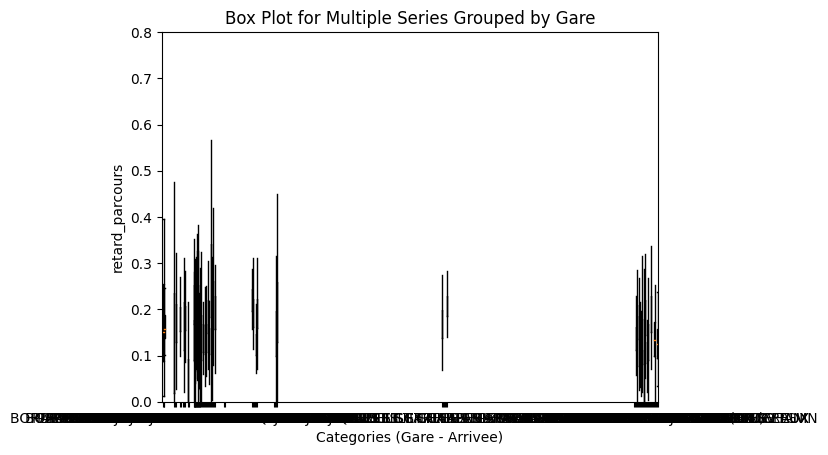

In [194]:
category_groups = []

# Iterate through each 'gare' and add the data for each 'arrivee' to the list
for i, (gare, arrivees) in enumerate(lignes_au_depart.items()):
    if len(arrivees) > 1:
        for j, arrivee in enumerate(arrivees):
            subset_data = data2[(data2['gare_depart'] == gare) & (data2['gare_arrivee'] == arrivee)][scalar_column]
            category_groups.append(subset_data)

            # Create a label for the box with the 'gare' and 'arrivee'
            label = f'{gare} - {arrivee}'
            x_position = i * len(arrivees) + j + 1

            # Create a box plot for the current 'gare' and 'arrivee'
            plt.boxplot(subset_data, positions=[x_position], labels=[label], showfliers=False)

# Set the title, labels, and y-axis scale
plt.title('Box Plot for Multiple Series Grouped by Gare')
plt.xlabel('Categories (Gare - Arrivee)')
plt.ylabel(scalar_column)
plt.ylim(0, 0.8)

# Show the plot
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

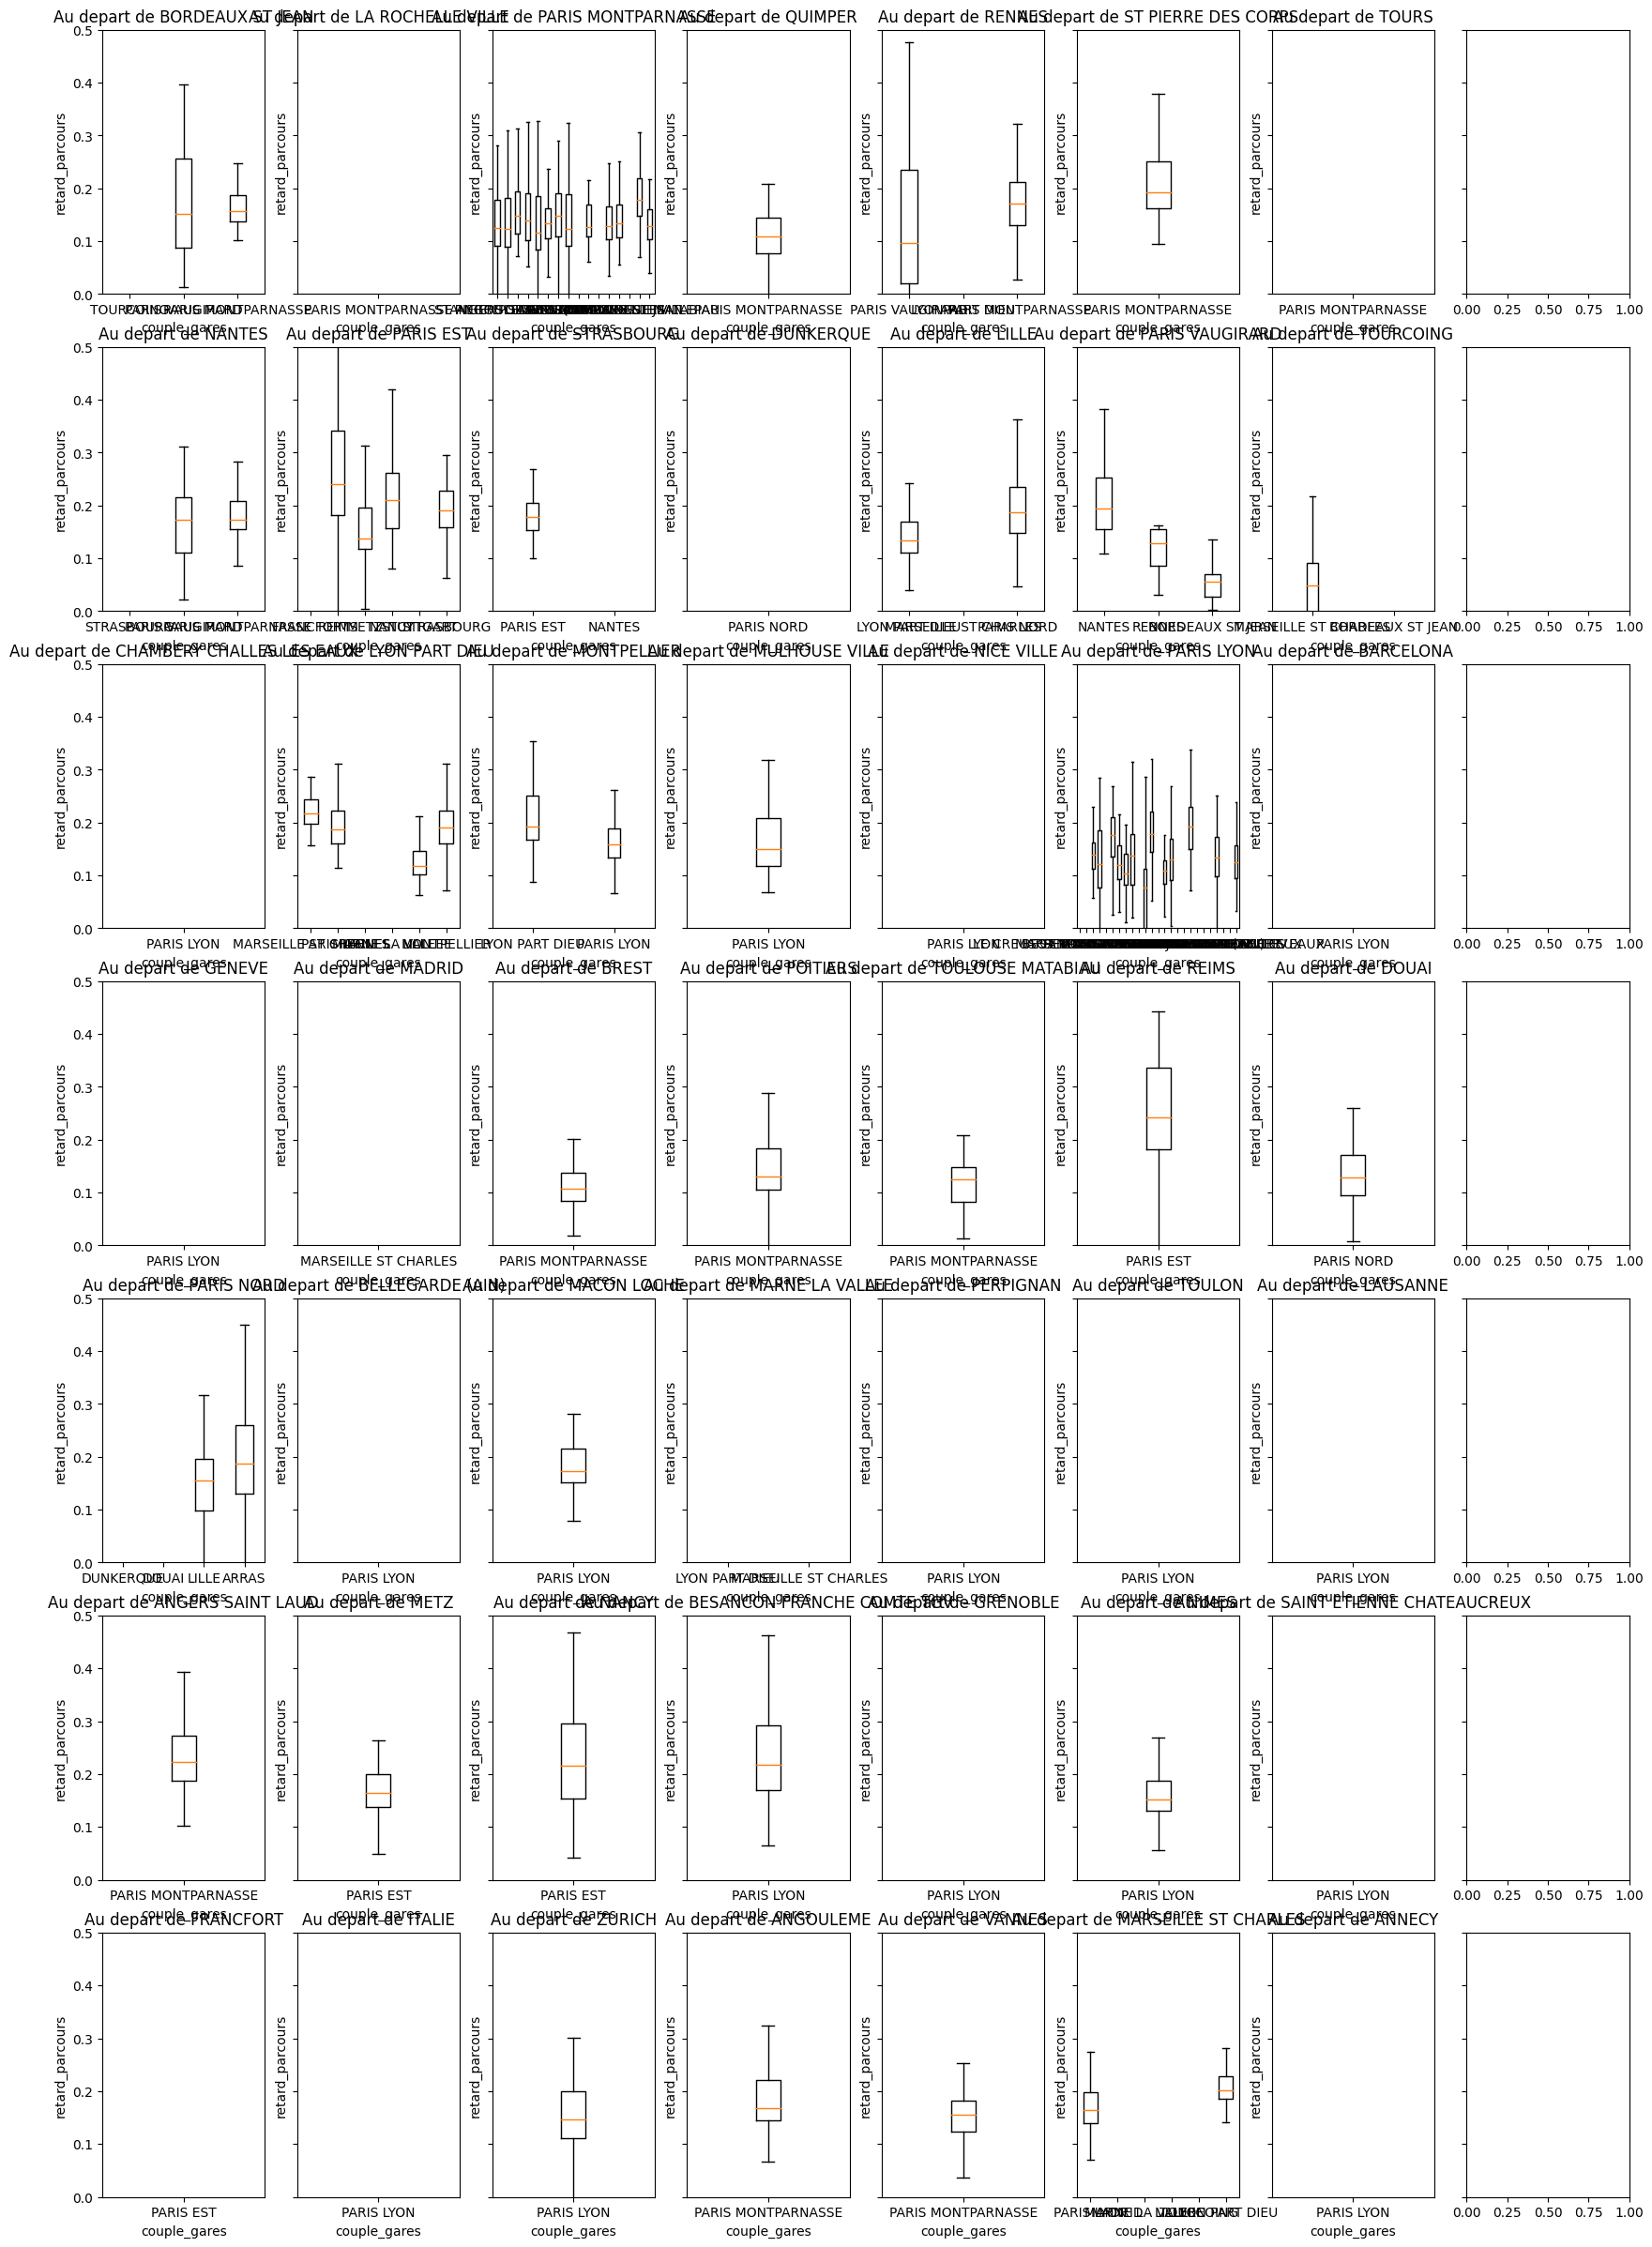

In [201]:
categorical_column = 'couple_gares'
scalar_column = 'retard_parcours'

fig, axes = plt.subplots(nrows=7, ncols=8, figsize=(21,30), sharex=False, sharey=True) 

for i, (gare, arrivees) in enumerate(lignes_au_depart.items()):
    category_groups = [data2[(data2['gare_depart'] == gare) & (data2['gare_arrivee']==arrivee)][scalar_column] for arrivee in arrivees]
    plt.sca(axes[i//7, i%7])
    # Create a box plot to visualize the relationship.
    plt.boxplot(category_groups, labels=arrivees, vert=True, showfliers=False)
    plt.title(f'Au depart de {gare}')
    plt.xlabel(categorical_column)
    plt.ylabel(scalar_column)
    plt.ylim(0,0.5)

plt.show()

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

C:\Users\User\AppData\Local\Temp\ipykernel_11144\234549797.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['retard_parcours'] = (filtered_df['retard_moyen_arrivee']-filtered_df['retard_moyen_depart'])/filtered_df['duree_moyenne']
C:\Users\User\AppData\Local\Temp\ipykernel_11144\234549797.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_number'] = filtered_df['date'].apply(lambda date: int(date.month))
C:\Users\User\AppData\Local\Temp\ipykernel_11144\234549797.py:16: S

130


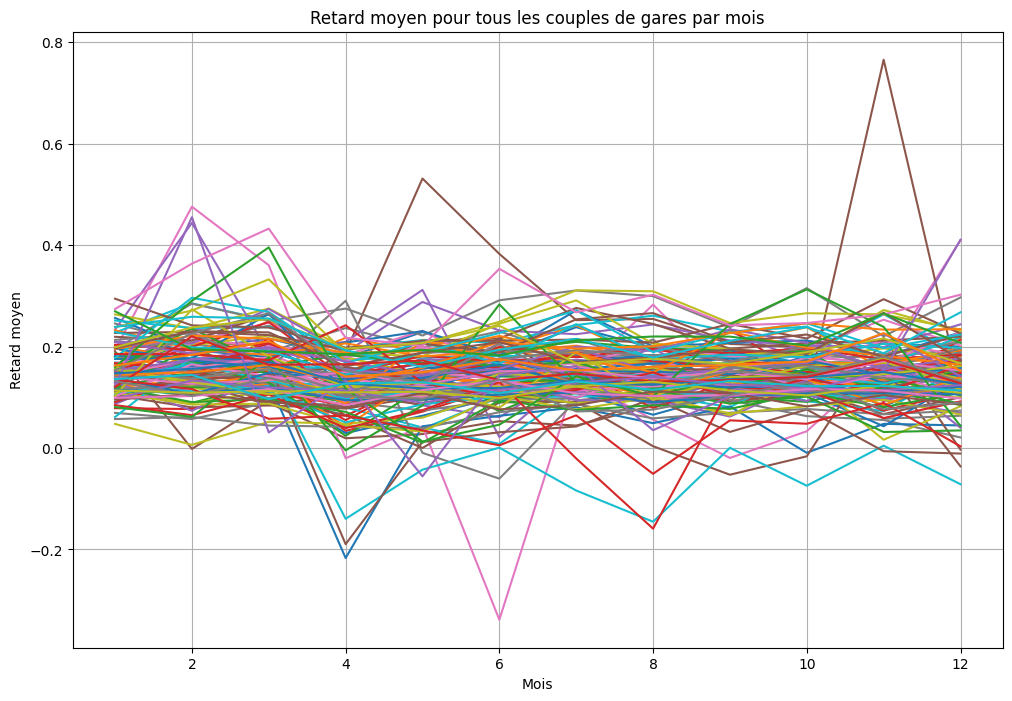

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
# Convertir la colonne 'date' en datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste de tous les couples de gares uniques
couple_unique = data[['gare_depart', 'gare_arrivee']].drop_duplicates()

# Créer un graphique pour superposer les courbes
plt.figure(figsize=(12, 8))
i=0
for couple in couple_unique.itertuples():
    gare_depart, gare_arrivee = couple.gare_depart, couple.gare_arrivee
    filtered_df = data[(data['gare_depart'] == gare_depart) & (data['gare_arrivee'] == gare_arrivee)]
    
    filtered_df['retard_parcours'] = (filtered_df['retard_moyen_arrivee']-filtered_df['retard_moyen_depart'])/filtered_df['duree_moyenne']

    filtered_df['month_number'] = filtered_df['date'].apply(lambda date: int(date.month))
    month_mean=filtered_df.groupby('month_number')['retard_parcours'].mean().reset_index()[['month_number', 'retard_parcours']]
    
    # Tracer la courbe pour ce couple
    plt.plot(month_mean['month_number'].to_list(), month_mean['retard_parcours'].to_list(), label=f'{gare_depart} - {gare_arrivee}')
    i+=1
print(i)

# Définir des titres et des étiquettes d'axe
plt.title('Retard moyen pour tous les couples de gares par mois')
plt.xlabel('Mois')
plt.ylabel('Retard moyen')
plt.grid(True)

# Afficher le graphique
plt.show()

In [52]:
data.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [69]:
retard_moyen_par_couple = data.groupby(['gare_depart', 'gare_arrivee'])['retard_moyen_depart'].mean().reset_index()

In [70]:
retard_moyen_par_couple['retard_moyen_arrivee']=data.groupby(['gare_depart', 'gare_arrivee'])['retard_moyen_arrivee'].mean().reset_index()['retard_moyen_arrivee']

In [71]:
retard_moyen_par_couple['retard_parcours'] = retard_moyen_par_couple['retard_moyen_arrivee']-retard_moyen_par_couple['retard_moyen_depart']

In [72]:
retard_moyen_par_couple['duree_moyenne'] = data.groupby(['gare_depart', 'gare_arrivee'])['duree_moyenne'].mean().reset_index()['duree_moyenne']

In [73]:
retard_moyen_par_couple['retard_relatif_parcours'] = retard_moyen_par_couple['retard_parcours']/retard_moyen_par_couple['duree_moyenne']

In [74]:
retard_moyen_par_couple

,gare_depart,gare_arrivee,retard_moyen_depart,retard_moyen_arrivee,retard_parcours,duree_moyenne,retard_relatif_parcours
0,AIX EN PROVENCE TGV,PARIS LYON,8.315476,45.390239,37.074763,186.757576,0.198518
1,ANGERS SAINT LAUD,PARIS MONTPARNASSE,7.227171,28.727275,21.500104,95.454545,0.225239
2,ANGOULEME,PARIS MONTPARNASSE,7.048854,30.559323,23.510468,127.409091,0.184527
3,ANNECY,PARIS LYON,18.472763,31.985875,13.513112,223.818182,0.060375
4,ARRAS,PARIS NORD,7.771044,18.486458,10.715415,51.227273,0.209174
...,...,...,...,...,...,...,...
125,TOURCOING,MARSEILLE ST CHARLES,12.596154,28.723779,16.127625,305.307692,0.052824
126,TOURS,PARIS MONTPARNASSE,6.789995,16.457913,9.667918,76.121212,0.127007
127,VALENCE ALIXAN TGV,PARIS LYON,11.377453,37.504006,26.126553,133.363636,0.195905
128,VANNES,PARIS MONTPARNASSE,6.047334,30.744436,24.697103,159.787879,0.154562


In [57]:
import matplotlib.pyplot as plt

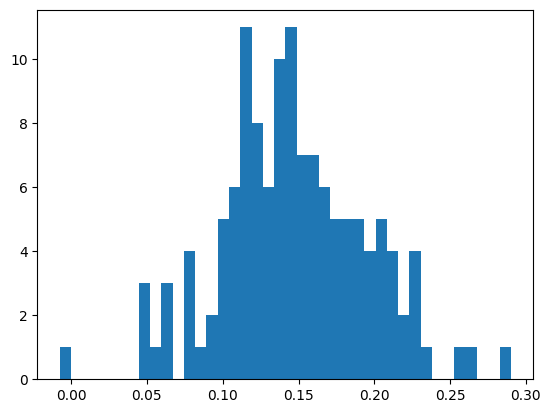

In [75]:
plt.hist(retard_moyen_par_couple['retard_relatif_parcours'].to_list(), bins=40)
plt.show()

In [43]:
dict(data[['gare_depart', 'gare_arrivee']].value_counts())

{('AIX EN PROVENCE TGV', 'PARIS LYON'): 66,
 ('PARIS MONTPARNASSE', 'NANTES'): 66,
 ('PARIS MONTPARNASSE', 'LAVAL'): 66,
 ('PARIS MONTPARNASSE', 'LA ROCHELLE VILLE'): 66,
 ('PARIS MONTPARNASSE', 'BREST'): 66,
 ('PARIS MONTPARNASSE', 'BORDEAUX ST JEAN'): 66,
 ('PARIS MONTPARNASSE', 'ANGOULEME'): 66,
 ('PARIS MONTPARNASSE', 'ANGERS SAINT LAUD'): 66,
 ('PARIS LYON', 'VALENCE ALIXAN TGV'): 66,
 ('PARIS LYON', 'TOULON'): 66,
 ('PARIS LYON', 'SAINT ETIENNE CHATEAUCREUX'): 66,
 ('PARIS LYON', 'PERPIGNAN'): 66,
 ('PARIS LYON', 'NIMES'): 66,
 ('PARIS LYON', 'NICE VILLE'): 66,
 ('PARIS LYON', 'MULHOUSE VILLE'): 66,
 ('PARIS LYON', 'MONTPELLIER'): 66,
 ('PARIS LYON', 'MARSEILLE ST CHARLES'): 66,
 ('PARIS LYON', 'MACON LOCHE'): 66,
 ('PARIS LYON', 'LYON PART DIEU'): 66,
 ('PARIS LYON', 'LE CREUSOT MONTCEAU MONTCHANIN'): 66,
 ('PARIS LYON', 'LAUSANNE'): 66,
 ('PARIS LYON', 'ITALIE'): 66,
 ('PARIS LYON', 'GRENOBLE'): 66,
 ('PARIS LYON', 'GENEVE'): 66,
 ('PARIS LYON', 'DIJON VILLE'): 66,
 ('PARIS LYO

In [15]:
data['service'].value_counts()

National         7142
International    1012
Name: service, dtype: int64

In [16]:
data.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,...,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,NaN,88.434265,11.205745,3.076737,NaN,34.516066,33.950971,...,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,NaN,90.384803,12.476780,5.432676,NaN,29.729349,15.702663,...,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,...,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,NaN,22.000000,5.128410,1.140258,NaN,13.000000,24.636941,...,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,NaN,55.000000,9.036447,2.248271,NaN,27.000000,32.441236,...,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,NaN,129.000000,14.219375,3.903651,NaN,47.000000,41.346717,...,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,299.600000,...,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [17]:
data['prct_cause_externe'].value_counts()

0.000000     828
25.000000    228
20.000000    209
50.000000    176
33.333333    156
            ... 
29.545455      1
44.827586      1
52.173913      1
53.571429      1
11.627907      1
Name: prct_cause_externe, Length: 1747, dtype: int64